# What this file does 

Kio raised a great point that schools in the same building (i.e. colocated schools) might have different ratings. This would throw the spatial analysis I did previously if true, so I wrote this file to check how many colocated schools — if any — have different ratings. I found that none of the colocated schools in this database had different ratings. 

While this means that my mapping analysis still makes sense, it does raise some questions about the quality of the data; in the data dictionary, ratings vary based on how many floors are accessible with the building. If colocated schools are on different floors in buildings that are not fully accessible, they should have different ratings. So why don't they?

Again, the data source is the Department of Education: https://nycdoe.sharepoint.com/sites/BAP/Shared%20Documents/Forms/AllItems.aspx?id=%2Fsites%2FBAP%2FShared%20Documents%2FBuilding%20Accessibility%20Profile%20List&p=true&originalPath=aHR0cHM6Ly9ueWNkb2Uuc2hhcmVwb2ludC5jb20vOmY6L3MvQkFQL0VwdzItQUtwNUs1THZXQzZYTFQ3Tk80Qlo2NW1CYmljTHlOUXYzdUltN09uTVE_cnRpbWU9MlBpc0hKX0gxMGc

And here is the link to the data dictionary: https://www.schools.nyc.gov/school-life/school-environment/building-accessibility

# How many schools colocate and do they have different ratings if they do?

According to this analysis, schools that colocate do not have different ratings. Not all schools that colocate are fully accessible, so we should expect to see some variation in ratings if schools are on different floors in the same building. I don't know why we don't see any.)

In this database, I've identified 887 schools that colocate from a dataset of about 1200 schools. 

In [ ]:
# import library

In [1]:
import pandas as pd

In [ ]:
#read in the geolocated data created from 

In [2]:
df = pd.read_csv('School-NYC-Accessibility-geolocated.csv')

In [ ]:
# save a list of all the building codes

In [18]:
building_codes = df['Building Code'].unique()

In [ ]:
#doing a test to extract ratings of all schools within a single building, i.e. with the same building code

In [22]:
df[df['Building Code']=='K002']['Rating'].unique()

array([10.])

In [ ]:
#function to count number of schools in each building and whether not those schools have different accessibility ratings

In [60]:
list_statuses = []
for code in building_codes:
    # create an empty row
    dict_code_status = {}
    
    #save the code
    dict_code_status['code'] = code
    
    #save the number of schools that share the same building code
    dict_code_status['no_schools_in_building'] = (len(df[df['Building Code']==code]))
    
    #save all the different ratings a school may get
    ratings_list = df[df['Building Code']==code]['Rating'].unique()
    dict_code_status['ratings'] = df[df['Building Code']==code]['Rating'].unique()
    
    #save whether or not different schools in the same building are receiving different ratings or not
    if len(ratings_list)==1:
        dict_code_status['status'] = 'Same'
    else:
        dict_code_status['status'] = 'Not Same'
    list_statuses += [dict_code_status]
        
        

In [ ]:
#saving results to a nice dataframe

In [62]:
df_status = pd.DataFrame(list_statuses)

In [ ]:
# all looks as it should

In [63]:
df_status

,code,no_schools_in_building,ratings,status
0,X040,3,[1.0],Same
1,X065,2,[6.0],Same
2,X151,4,[6.0],Same
3,X155,3,[4.0],Same
4,X156,3,[5.0],Same
...,...,...,...,...
640,R829,1,[9.0],Same
641,R840,1,[9.0],Same
642,R843,1,[8.0],Same
643,R861,2,[10.0],Same


In [ ]:
#all returned same

In [64]:
df_status['status'].value_counts()

Same    645
Name: status, dtype: int64

In [ ]:
# saving the elemnts of the list in a different column

In [65]:
def list_liberate(my_list):
    for element in my_list:
        return element

In [ ]:
#saving it as 'rating'

In [66]:
df_status['rating'] = df_status['ratings'].apply(lambda x: list_liberate(x))

In [ ]:
#distribution of ratings of all schools

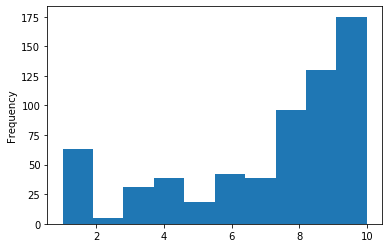

In [68]:
df_status['rating'].plot(kind='hist')

In [ ]:
#distributions of ratings for schools that share buildings; basically reflective of the trend above

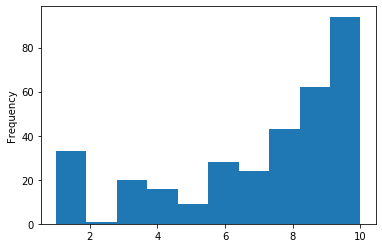

In [67]:
df_status[df_status['no_schools_in_building']>1]['rating'].plot(kind='hist')

In [69]:
df_status[df_status['no_schools_in_building']>1]

,code,no_schools_in_building,ratings,status,rating
0,X040,3,[1.0],Same,1.0
1,X065,2,[6.0],Same,6.0
2,X151,4,[6.0],Same,6.0
3,X155,3,[4.0],Same,4.0
4,X156,3,[5.0],Same,5.0
...,...,...,...,...,...
634,R450,2,[7.0],Same,7.0
635,R455,3,[7.0],Same,7.0
638,R600,2,[8.0],Same,8.0
643,R861,2,[10.0],Same,10.0


In [ ]:
#tallying up the number of schools that sre colocating - 887 in totoal 

In [70]:
df_status[df_status['no_schools_in_building']>1]['no_schools_in_building'].sum()

887

In [ ]:
#saving results to a database

In [71]:
df_status.to_csv('colocation.csv')